In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
files = []
for f in [f for f in os.listdir('.') if f.startswith('batch_') and f.endswith('.csv')]:
    tmp = pd.read_csv(f)
    tmp['actions'] = int(f.split('.')[0].split('_')[1])
    files.append(tmp)

df = pd.concat(files)
list(df.actions.unique())

[1000, 200, 600, 100]

In [3]:
def get_algos(df):
    algos = set()
    
    for l in list(df.name.unique()):
        parts = [p for p in l.split('_') if not p.isdigit()]
        algos.add("_".join(parts))
    return list(algos)

In [4]:

def get_top_n_each_algo(f, n):
    res = set()
    for algo in get_algos(df):
        s = df[df.name.str.startswith(f'{algo}_' )]
        top = set(s[s.file == f].sort_values('mean_ratio').tail(n)['name'])
        res.update(top)
    return res

def get_top_n(n):
    cats = set()
    for f in df.file.unique():
        cats.update(get_top_n_each_algo(f, n))
    return df[df.name.map(lambda x: x in cats)]

top1 = get_top_n(1)
top2 = get_top_n(2)

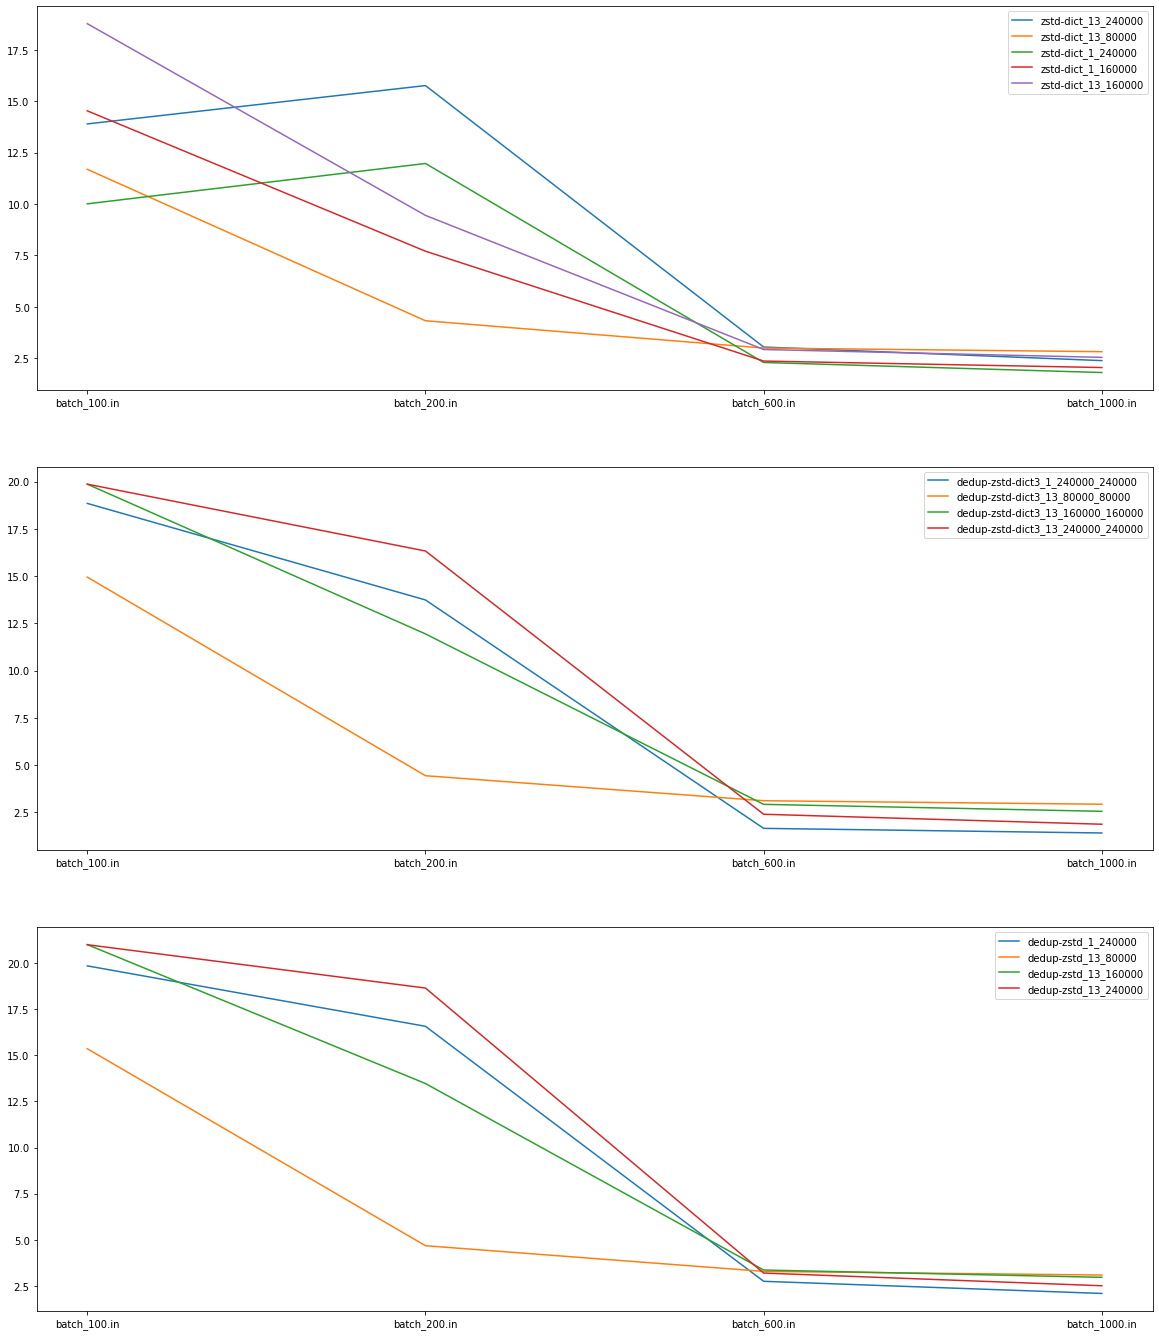

In [5]:

plt.figure(figsize=(20,8 * 3))

def plot_algo(df, algo, position):
    plt.subplot(3,1,position)
    df = df[df.name.str.startswith(f'{algo}_')]
    df = df.sort_values('actions')

    for n in df.name.unique():
        s = df[df.name == n]
        plt.plot(s.file, s.mean_ratio, label=n)
    plt.legend()

plot_algo(top2, 'zstd-dict', 1)
plot_algo(top2, 'dedup-zstd-dict3', 2)
plot_algo(top2, 'dedup-zstd', 3)

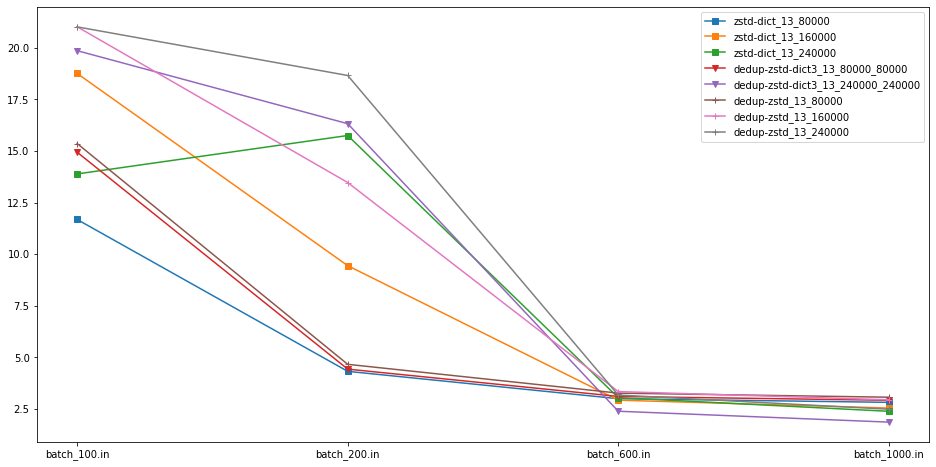

In [6]:

def plot_algo2(df, algo, position, marker_style):
    df = df[df.name.str.startswith(f'{algo}_')]
    df = df.sort_values('actions')

    for n in df.name.unique():
        s = df[df.name == n]
        plt.plot(s.file, s.mean_ratio, label=n, marker=marker_style)

plt.figure(figsize=(16,8))
plot_algo2(top1, 'zstd-dict', 1, 's')
plot_algo2(top1, 'dedup-zstd-dict3', 2, 'v')
plot_algo2(top1, 'dedup-zstd', 3, '+')
plt.legend()


In [7]:
df[df.actions == 1000].sort_values('mean_ratio').tail(10)

,file,client,total_lines,raw_size,name,n_batches,mean_ratio,mean_lines,mean_header,mean_batch_size,actions
2,batch_1000.in,0,2000,27358320,dedup-zstd-dict3_1_80000_80000,56,2.398691,35.160714,37587.696429,200498.803571,1000
1,batch_1000.in,0,2000,27358320,zstd-dict_1_80000,56,2.425127,35.464286,27653.678571,200023.107143,1000
15,batch_1000.in,0,2000,27358320,dedup-zstd_13_240000,54,2.491254,36.629630,82907.240741,201136.481481,1000
0,batch_1000.in,0,2000,27358320,dedup-zstd_1_80000,53,2.530044,37.132075,27967.679245,200761.641509,1000
13,batch_1000.in,0,2000,27358320,zstd-dict_13_160000,53,2.548622,37.396226,46628.792453,200710.603774,1000
14,batch_1000.in,0,2000,27358320,dedup-zstd-dict3_13_160000_160000,53,2.549220,37.490566,68434.188679,201161.792453,1000
10,batch_1000.in,0,2000,27358320,zstd-dict_13_80000,48,2.824954,41.375000,24884.958333,200337.645833,1000
11,batch_1000.in,0,2000,27358320,dedup-zstd-dict3_13_80000_80000,46,2.925341,42.934783,33704.500000,200767.695652,1000
12,batch_1000.in,0,2000,27358320,dedup-zstd_13_160000,46,2.949021,43.347826,47456.978261,201058.652174,1000
9,batch_1000.in,0,2000,27358320,dedup-zstd_13_80000,44,3.073275,45.113636,25062.113636,200805.636364,1000


In [8]:
df[(df.actions == 1000) & (df.name.str.startswith('zstd'))].sort_values('mean_ratio').tail(5)

,file,client,total_lines,raw_size,name,n_batches,mean_ratio,mean_lines,mean_header,mean_batch_size,actions
4,batch_1000.in,0,2000,27358320,zstd-dict_1_160000,66,2.054114,30.075758,56166.348485,200283.909091,1000
16,batch_1000.in,0,2000,27358320,zstd-dict_13_240000,56,2.390975,35.107143,69535.785714,200853.357143,1000
1,batch_1000.in,0,2000,27358320,zstd-dict_1_80000,56,2.425127,35.464286,27653.678571,200023.107143,1000
13,batch_1000.in,0,2000,27358320,zstd-dict_13_160000,53,2.548622,37.396226,46628.792453,200710.603774,1000
10,batch_1000.in,0,2000,27358320,zstd-dict_13_80000,48,2.824954,41.375000,24884.958333,200337.645833,1000
